In [3]:
#завантажуємо та працюємо з файлом shopping_trends.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("shopping_trends.csv", encoding="cp1251")

print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [4]:
# Визначаємо розмір таблиці
print("Розмір таблиці:", data.shape)

# Визначаємо наявність пропусків
print("Кількість пропусків:")
print(data.isnull().sum())

# Визначаємо наявність дублікатів
print("Дублікати:", data.duplicated().sum())

# Визначаємо типи даних у стовпцях
print("Типи даних:")
print(data.dtypes)

Розмір таблиці: (3900, 19)
Кількість пропусків:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Дублікати: 0
Типи даних:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season              

In [5]:
#Перейменовуємо наззви стовпців
data.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

# Вивід оновленої таблиці з новими назвами стовпців
print("Оновлена таблиця з новими назвами стовпців:")
print(data.head())

Оновлена таблиця з новими назвами стовпців:
   customer_id  age gender item_purchased  category  purchase_amount_(usd)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        location size      color  season  review_rating subscription_status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  payment_me

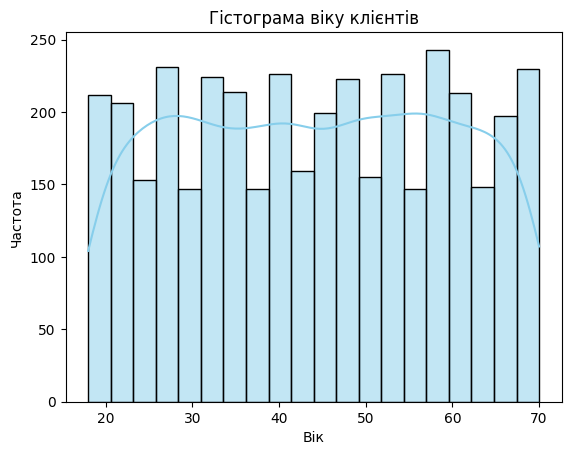

In [6]:
# Побудова гістограми віку клієнтів
sns.histplot(data, x='age', bins=20, kde=True, color='skyblue')
plt.title('Гістограма віку клієнтів')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

<ipython-input-7-073240bff93f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_items.head(10), x = "Кількість покупок", y = "Товар", palette="viridis")


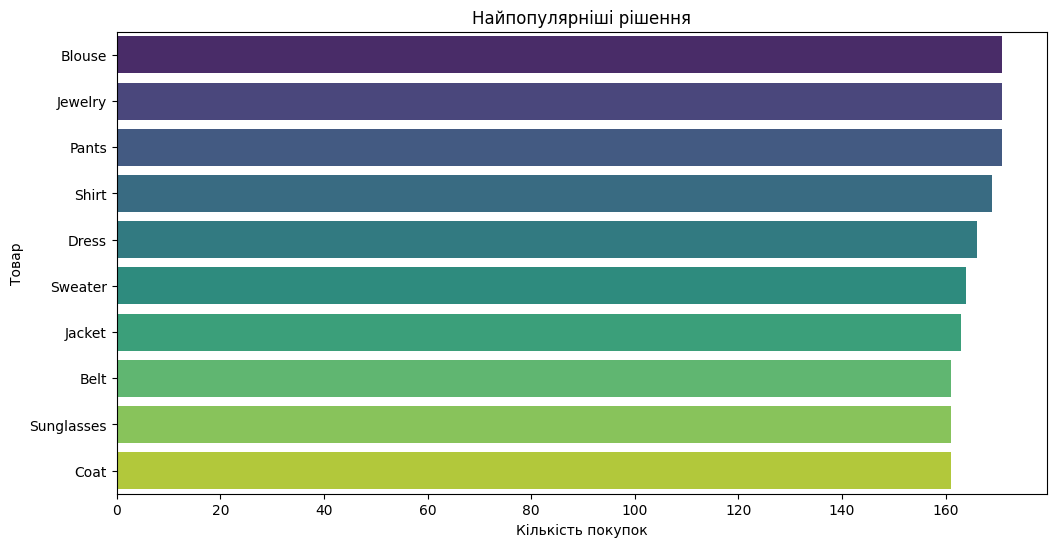

In [7]:
#Розподіл покупок за статтею (item_purchased)
top_items = data["item_purchased"].value_counts().reset_index()
top_items.columns = ["Товар", "Кількість покупок"]

plt.figure(figsize=(12,6))
sns.barplot(data=top_items.head(10), x = "Кількість покупок", y = "Товар", palette="viridis")

plt.title("Найпопулярніші рішення")
plt.xlabel("Кількість покупок")
plt.ylabel("Товар")

plt.show()

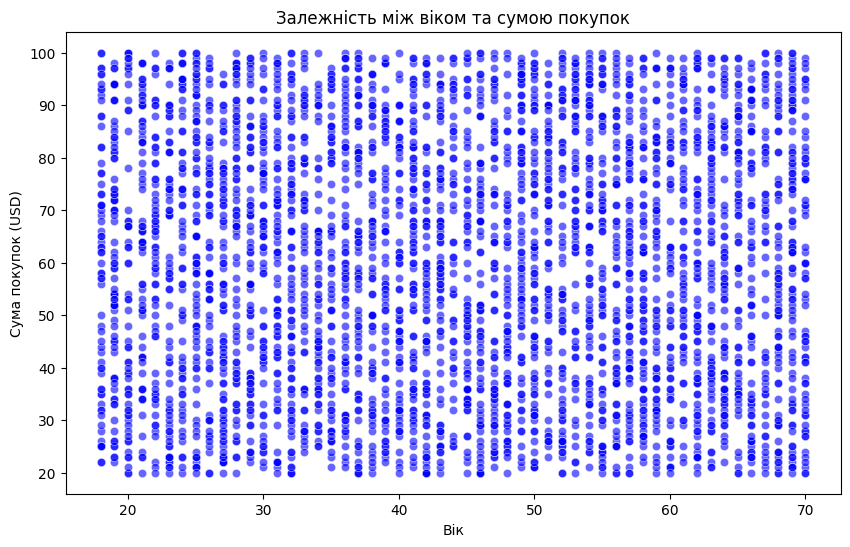

In [8]:
#Залежність між віком та сумою покупок (purchase_amount)
plt.figure(figsize=(10,6))
sns.scatterplot(data, x="age", y="purchase_amount_(usd)", alpha=0.6, color="blue")

plt.title("Залежність між віком та сумою покупок")
plt.xlabel("Вік")
plt.ylabel("Сума покупок (USD)")

plt.show()

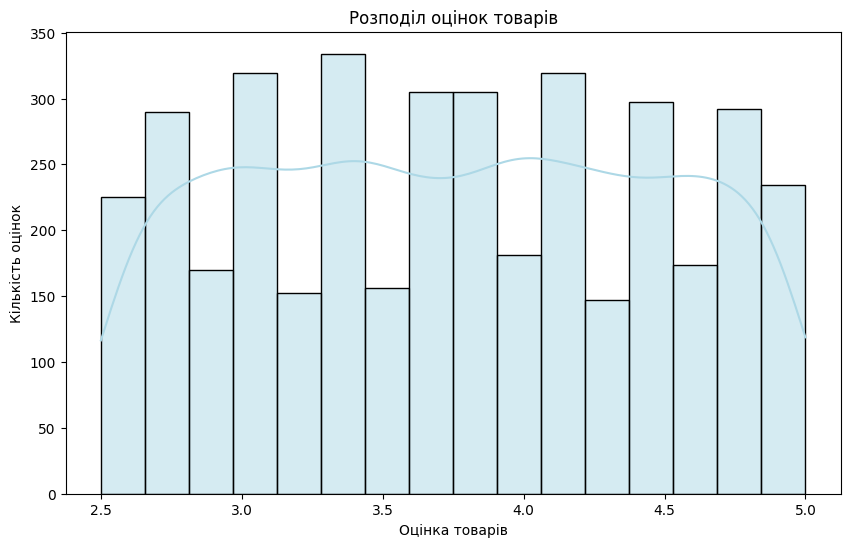

In [9]:
#Графік розподілу оцінок товарів (review_rating)
plt.figure(figsize=(10, 6))
sns.histplot(data, x='review_rating', kde=True, color='lightblue')

plt.title("Розподіл оцінок товарів")
plt.xlabel("Оцінка товарів")
plt.ylabel("Кількість оцінок")

plt.show()

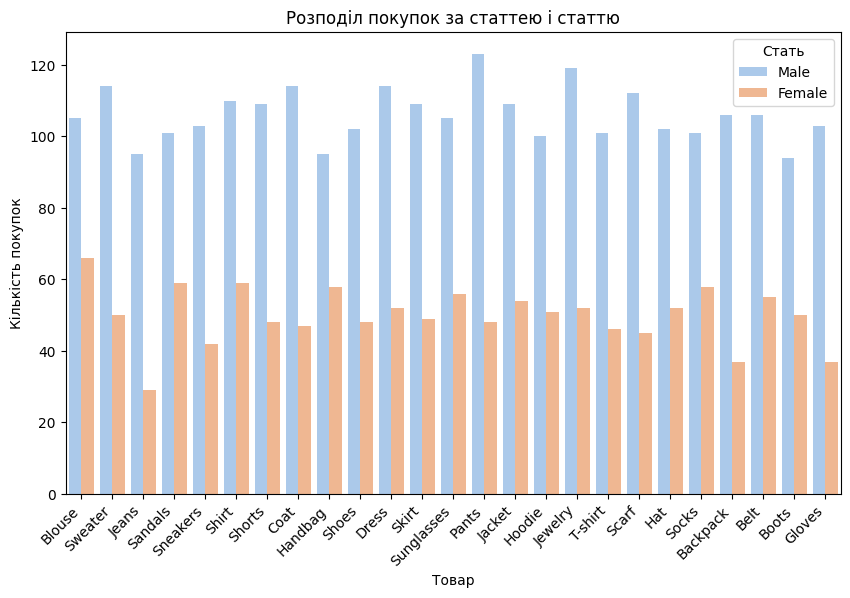

In [10]:
#Категоріальна діаграма для статі (gender)
plt.figure(figsize=(10, 6))
sns.countplot(data, x='item_purchased', hue='gender', palette='pastel')

plt.title('Розподіл покупок за статтею і статтю')
plt.xlabel('Товар')
plt.ylabel('Кількість покупок')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Стать')
plt.show()

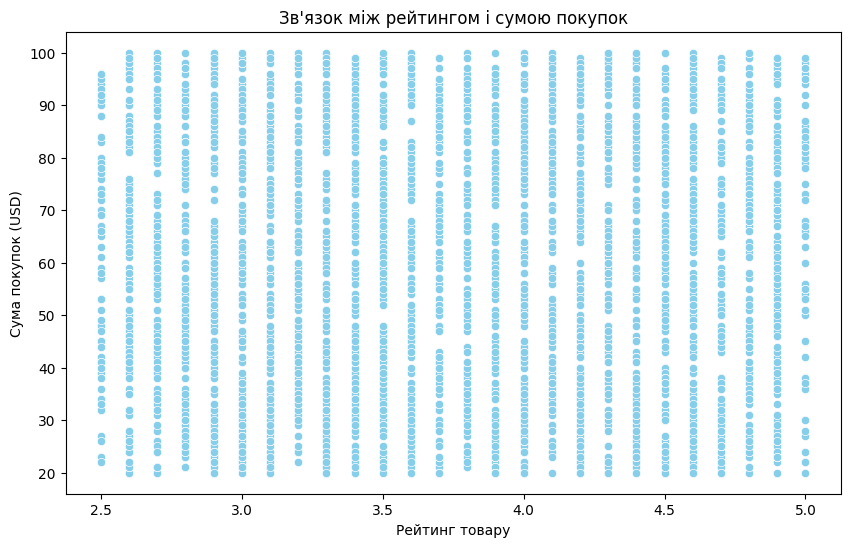

In [11]:
#Залежність між рейтингом і сумою покупок (review_rating і purchase_amount)
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='review_rating', y='purchase_amount_(usd)', color='skyblue')

plt.title('Зв\'язок між рейтингом і сумою покупок')
plt.xlabel('Рейтинг товару')
plt.ylabel('Сума покупок (USD)')
plt.show()

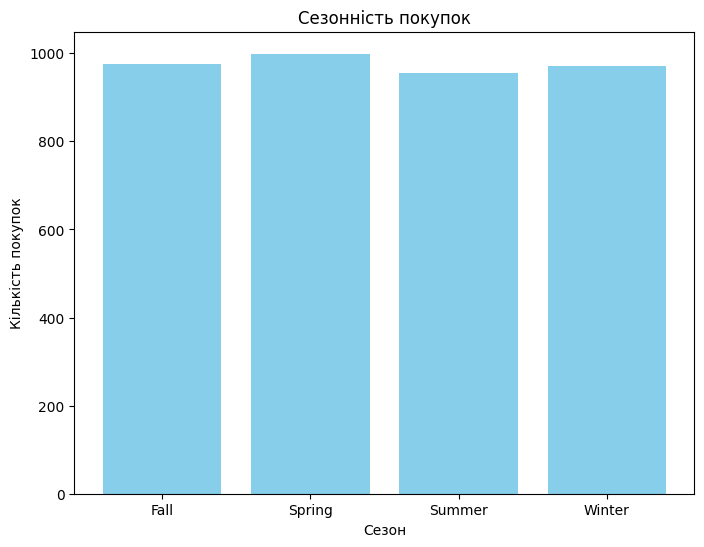

In [12]:
#Сезонність покупок (season)
season_purchases = data.groupby('season')['customer_id'].count().reset_index()

# Побудова стовпчатої діаграми
plt.figure(figsize=(8, 6))
plt.bar(season_purchases['season'], season_purchases['customer_id'], color='skyblue')

plt.title('Сезонність покупок')
plt.xlabel('Сезон')
plt.ylabel('Кількість покупок')
plt.show()

<ipython-input-13-6a9ee8dccccf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='size', palette='pastel')


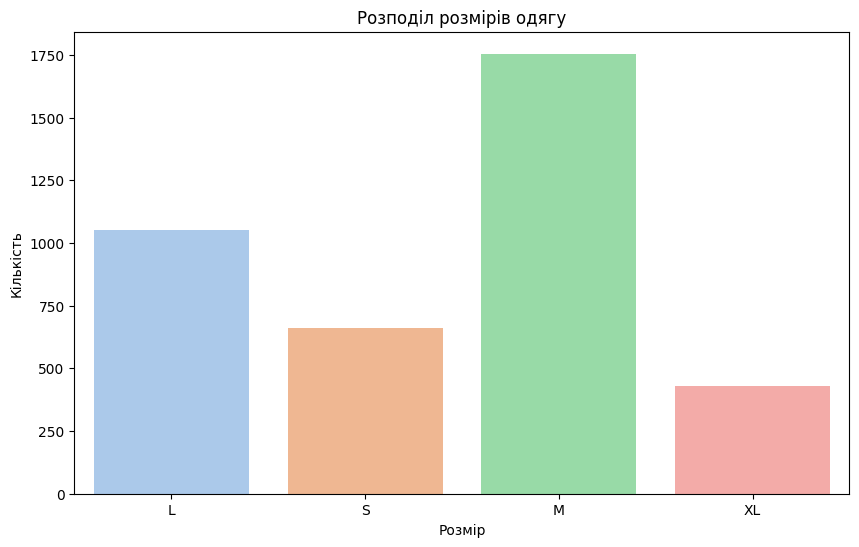

In [13]:
#Графік розподілу розмірів одягу (size)
plt.figure(figsize=(10, 6))
sns.countplot(data, x='size', palette='pastel')

plt.title('Розподіл розмірів одягу')
plt.xlabel('Розмір')
plt.ylabel('Кількість')
plt.show()

<ipython-input-14-1d9fd5fcae29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='payment_method', palette='pastel')


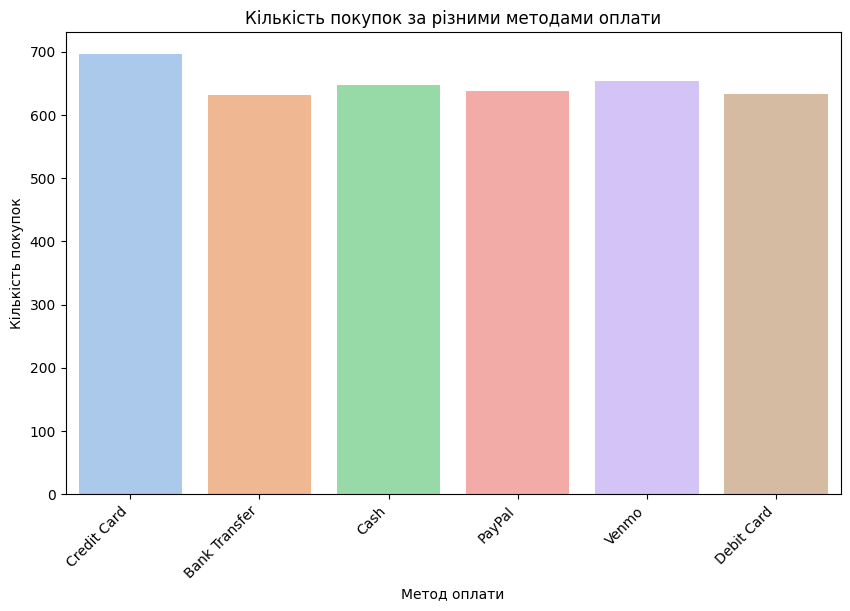

In [14]:
#Кількість покупок відносно типу оплати (payment_method)
plt.figure(figsize=(10, 6))
sns.countplot(data, x='payment_method', palette='pastel')

plt.title('Кількість покупок за різними методами оплати')
plt.xlabel('Метод оплати')
plt.ylabel('Кількість покупок')
plt.xticks(rotation=45, ha='right')
plt.show()

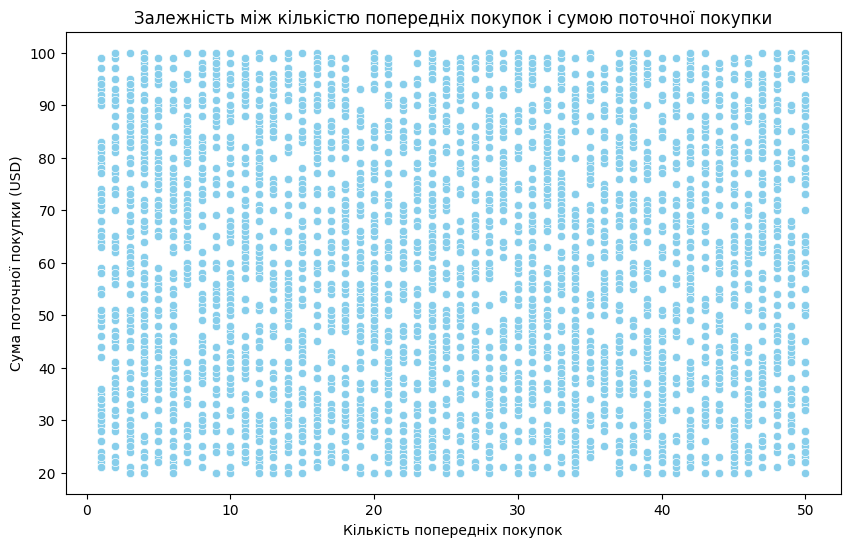

In [16]:
#Залежність між кількістю попередніх покупок (previous_purchases) і сумою поточної покупки (purchase_amount)
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='previous_purchases', y='purchase_amount_(usd)', color='skyblue')

plt.title('Залежність між кількістю попередніх покупок і сумою поточної покупки')
plt.xlabel('Кількість попередніх покупок')
plt.ylabel('Сума поточної покупки (USD)')
plt.show()

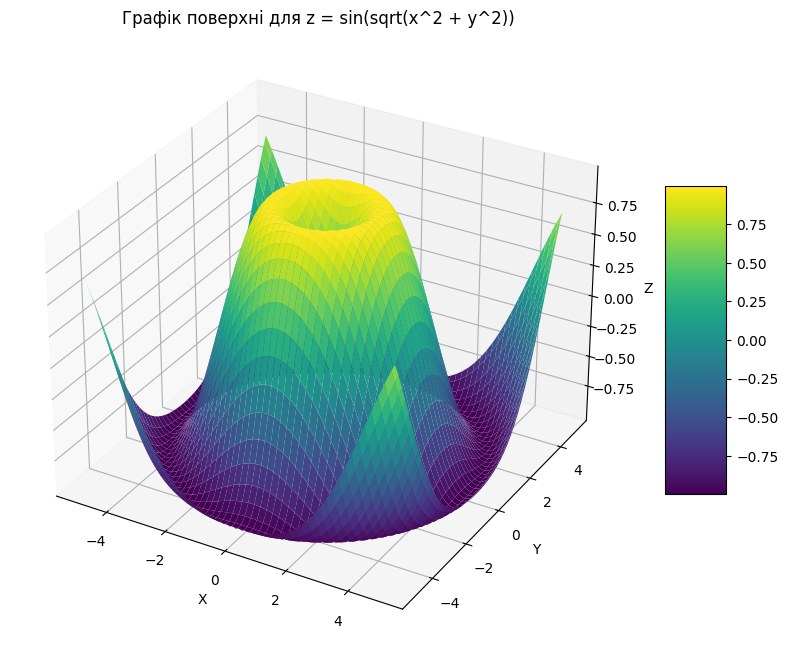

In [17]:
#Завдання 2
#графік теплової поверхні для візуалізації залежності між
#двома або більше числовими змінними

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Генеруємо дані
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Побудова графіка
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')

# Налаштування відображення графіка
ax.set_title('Графік поверхні для z = sin(sqrt(x^2 + y^2))')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

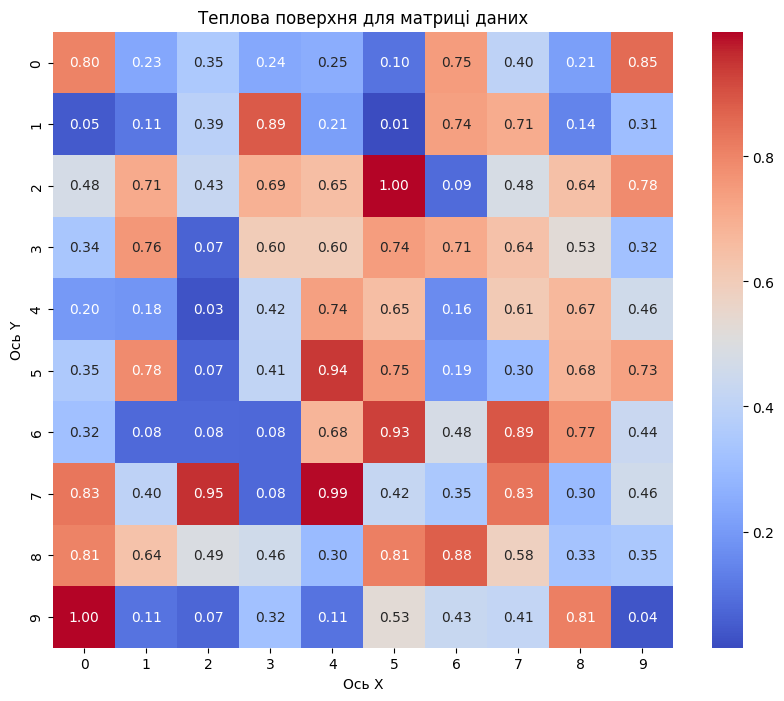

In [18]:
#Завдання 3
#графік теплової поверхні (heatmap), де кольори
#відображають значення відповідних елементів матриці.

data_matrix = np.random.rand(10, 10)

# Побудова графіка теплової поверхні
plt.figure(figsize=(10, 8))
sns.heatmap(data_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Теплова поверхня для матриці даних')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.show()